In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
#NOTE - burada tensorflow ile yapılan işlem scikit-learn ile yapılıyor

c:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


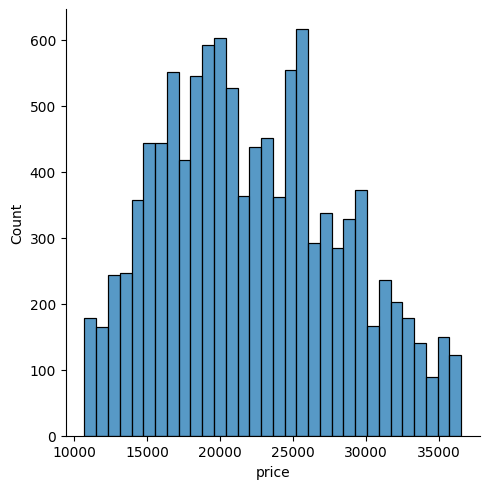

In [4]:
dataFrame = pd.read_excel("merc.xlsx")
mapping = {"Manual": 1, "Semi-Auto": 2, "Automatic":3}
dataFrame.loc[:, 'transmission'] = dataFrame['transmission'].map(mapping).fillna(0)
dataFrame = dataFrame[dataFrame["engineSize"]>1]
dataFrame = dataFrame[dataFrame["transmission"]>0]
dataFrame = dataFrame[dataFrame["tax"]>0]
dataFrame = dataFrame.sort_values("price",ascending=False).iloc[1500:12500]
sbn.displot(dataFrame["price"])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



In [6]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values
# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)




In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# Polinom özellikleri oluşturma
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Modeli eğitme
#model = KNeighborsRegressor(n_neighbors=2)
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = Lasso(alpha=1.0)
#model = Ridge(alpha=1)
#model = LinearRegression()

model.fit(x_train_poly, y_train)
score = model.score(x_test_poly, y_test)
print(f"Modelin doğruluk oranı: {score}")

Modelin doğruluk oranı: 0.8716641626655844


1600.5258718828816


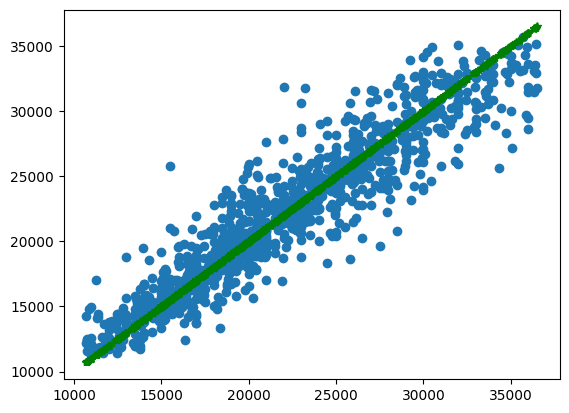

In [8]:
from sklearn.metrics import mean_absolute_error
tahminDizisi = model.predict(x_test_poly)
print(mean_absolute_error(y_test,tahminDizisi))
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")